
# Modélisation RIASEC - JobIRL
Marc ALBERNHE @DataStratégie
Avril 2020


Datasource : Raw data from online personality tests https://openpsychometrics.org/_rawdata/


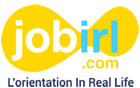

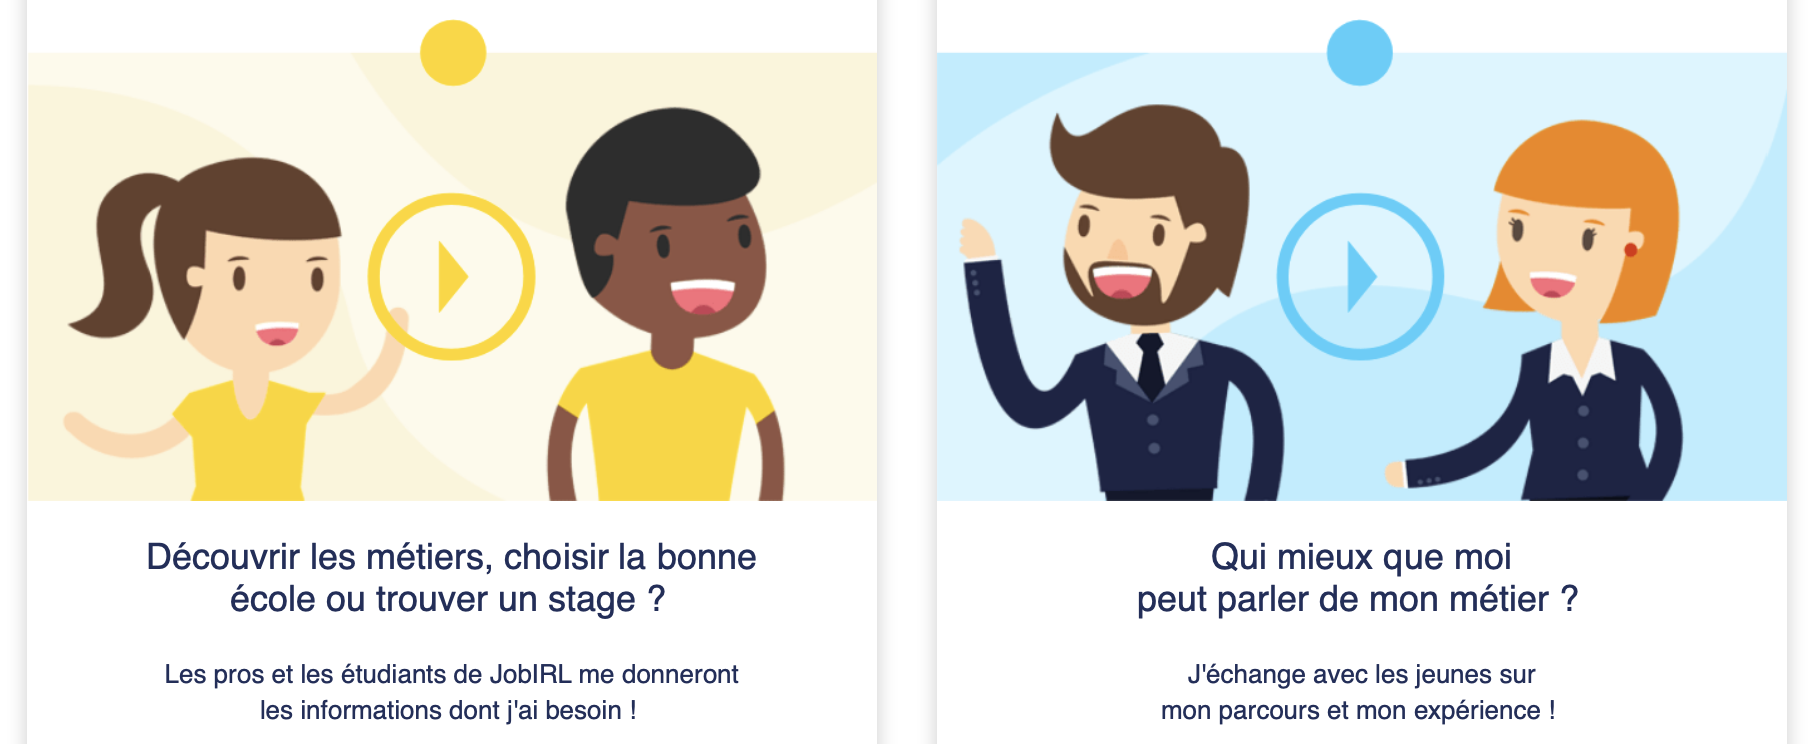

# STEP #0: LA PROBLEMATIQUE

# STEP #1: IMPORT DES DONNEES

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns


In [2]:
# Constantes du modèle RIASEC
Riasec = [['R', 'I', 'A', 'S', 'E', 'C'], 
          ["Réaliste", "Investigateur", "Artistique", "Social", "Entreprenant", "Conventionnel"]]

for i in range (len(Riasec[0])) : print (Riasec[0][i] + ' = ' + Riasec[1][i])
    

R = Réaliste
I = Investigateur
A = Artistique
S = Social
E = Entreprenant
C = Conventionnel


In [78]:
# d = {'R':"Réaliste" , 'I':"Investigateur", 'A':"Artistique"}


In [3]:
# Constantes Ten Item Personality Inventory
Tipi = [['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10'], 
          ["Extraverti", "Critique", "Discipliné", "Anxieux", "Ouvert", "Réservé", "Sympathique", "Désorganisé", "Calme", "Conventionnel"]]

for i in range (len(Tipi[0])) : print (Tipi[0][i] + ' = ' + Tipi[1][i])


TIPI1 = Extraverti
TIPI2 = Critique
TIPI3 = Discipliné
TIPI4 = Anxieux
TIPI5 = Ouvert
TIPI6 = Réservé
TIPI7 = Sympathique
TIPI8 = Désorganisé
TIPI9 = Calme
TIPI10 = Conventionnel


In [4]:
# dataset réduit
riasec_df = pd.read_csv("data_small.csv", encoding="utf8", sep=";")

# dataset complet
#riasec_df = pd.read_csv("data_clean.csv", encoding="utf8", sep=";")

print ("Taille du dataset : " + str(riasec_df.shape))


Taille du dataset : (9999, 94)


In [5]:
#riasec_df.drop(['major'], axis='columns', inplace=True)
#riasec_df.drop(['id'], axis='columns', inplace=True)


In [6]:
# format des colonnes
riasec_df["age"] = pd.to_numeric(riasec_df["age"]) 

# supprimer les outliers Age > 100 ans 
riasec_df = riasec_df[riasec_df.age <= 100]
#riasec_df.drop(riasec_df[riasec_df.age > 100].index, inplace=True)

# supprimer les outliers FamilySize > 10 enfants 
riasec_df = riasec_df[riasec_df.familysize <= 10]

#riasec_df.dropna(inplace=True)
#riasec_df.reset_index(inplace=True)
print('Taille du dataset : ',riasec_df.shape[0], 'enregistrements', 'and', riasec_df.shape[1], 'features')


Taille du dataset :  9954 enregistrements and 94 features


# STEP #2: EXPLORATION ET TRAITEMENT DES DONNEES

In [7]:
# education			"How much education have you completed?", 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree
# urban				"What type of area did you live when you were a child?", 1=Rural (country side), 2=Suburban, 3=Urban (town, city)
# gender				"What is your gender?", 1=Male, 2=Female, 3=Other
# engnat				"Is English your native language?", 1=Yes, 2=No
# age					"How many years old are you?"
# hand				"What hand do you use to write with?", 1=Right, 2=Left, 3=Both
# religion			"What is your religion?", 1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other
# orientation			"What is your sexual orientation?", 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other
# race				"What is your race?", 1=Asian, 2=Arab, 3=Black, 4=Indigenous Australian / Native American / White, 5=Other (There was a coding error in the survey, and three different options were given the same value)
# voted				"Have you voted in a national election in the past year?", 1=Yes, 2=No
# married				"What is your marital status?", 1=Never married, 2=Currently married, 3=Previously married
# familysize			"Including you, how many children did your mother have?"		
# major				"If you attended a university, what was your major (e.g. "psychology", "English", "civil engineering")?"


In [8]:
riasec_df.columns

Index(['id', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'E1', 'E2', 'E3',
       'E4', 'E5', 'E6', 'E7', 'E8', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'introelapse', 'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2',
       'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9',
       'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16',
       'education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize',
       'uniqueNetworkLocation', 'country', 'source', 'major'],
      dtype='object')

In [9]:
riasec_df.head()


,id,R1,R2,R3,R4,R5,R6,R7,R8,I1,...,religion,orientation,race,voted,married,familysize,uniqueNetworkLocation,country,source,major
0,1,3,4,3,1,1,4,1,3,5,...,7,1,1,2,1,1,1,US,2,NaN
1,2,1,1,2,4,1,2,2,1,5,...,7,3,4,1,2,3,1,US,1,Nursing
2,3,2,1,1,1,1,1,1,1,4,...,7,1,4,2,1,1,1,US,1,NaN
3,4,3,1,1,2,2,2,2,2,4,...,0,1,1,2,1,1,1,CN,0,NaN
4,5,4,1,1,2,1,1,1,2,5,...,4,3,1,2,1,4,1,PH,0,education


In [10]:
riasec_df.tail()

,id,R1,R2,R3,R4,R5,R6,R7,R8,I1,...,religion,orientation,race,voted,married,familysize,uniqueNetworkLocation,country,source,major
9994,9995,3,2,3,3,2,2,2,2,3,...,7,1,4,2,1,3,1,NZ,0,NaN
9995,9996,3,3,1,3,3,2,3,1,4,...,2,4,4,2,1,3,2,AU,1,NaN
9996,9997,3,2,2,5,2,3,3,2,4,...,12,1,4,2,1,2,2,AU,1,NaN
9997,9998,1,1,1,1,1,1,1,1,4,...,7,1,4,2,1,2,2,AU,0,NaN
9998,9999,2,3,3,2,2,2,2,3,4,...,1,1,4,2,1,3,2,AU,1,NaN


In [11]:
# somme des scores sur chacune des 6 dimensions R1->R8, I1->I8... du RIASEC et 6 nouvelles colonne pour stocker le résultat 

for i in range (0,6) : riasec_df[Riasec[0][i]] = 0

for i in range (0,6) :
    for j in range (1,9) : riasec_df[Riasec[0][i]] = riasec_df[Riasec[0][i]] + riasec_df[str(Riasec[0][i]) + str(j)]

# riasec_df['R']=0
# for j in range (1,9) : riasec_df['R'] = riasec_df['R'] + riasec_df['R'+str(j)]

#riasec_df['R'] = riasec_df['R1']+riasec_df['R2']+riasec_df['R3']+riasec_df['R4']+riasec_df['R5']+riasec_df['R6']+riasec_df['R7']+riasec_df['R8']
#riasec_df['I'] = riasec_df['I1']+riasec_df['I2']+riasec_df['I3']+riasec_df['I4']+riasec_df['I5']+riasec_df['I6']+riasec_df['I7']+riasec_df['I8']
#riasec_df['A'] = riasec_df['A1']+riasec_df['A2']+riasec_df['A3']+riasec_df['A4']+riasec_df['A5']+riasec_df['A6']+riasec_df['A7']+riasec_df['A8']
#riasec_df['S'] = riasec_df['S1']+riasec_df['S2']+riasec_df['S3']+riasec_df['S4']+riasec_df['S5']+riasec_df['S6']+riasec_df['S7']+riasec_df['S8']
#riasec_df['E'] = riasec_df['E1']+riasec_df['E2']+riasec_df['E3']+riasec_df['E4']+riasec_df['E5']+riasec_df['E6']+riasec_df['E7']+riasec_df['E8']
#riasec_df['C'] = riasec_df['C1']+riasec_df['C2']+riasec_df['C3']+riasec_df['C4']+riasec_df['C5']+riasec_df['C6']+riasec_df['C7']+riasec_df['C8']


In [12]:
# recherche de la caractéristique principale -> colonne MAJOR

riasec_df['MAX'] = riasec_df[['R','I','A','S','E','C']].max(axis=1)

riasec_df['MAJOR'] = riasec_df.apply(lambda x : Riasec[1][0] if x[Riasec[0][0]] == x['MAX'] 
                                     else Riasec[1][1] if x[Riasec[0][1]] == x['MAX'] 
                                     else Riasec[1][2] if x[Riasec[0][2]] == x['MAX'] 
                                     else Riasec[1][3] if x[Riasec[0][3]] == x['MAX'] 
                                     else Riasec[1][4] if x[Riasec[0][4]] == x['MAX'] 
                                     else Riasec[1][5] if x[Riasec[0][5]] == x['MAX'] 
                                     else "", axis=1)




riasec_df['MIN'] = riasec_df[['R','I','A','S','E','C']].min(axis=1)

#print (riasec_df['MAX'][0])
print (riasec_df.columns.get_loc("MIN"))

for i in range(riasec_df.shape[0]) :
#for i in range(20000) : 
    #riasec_df['MIN'][i] = riasec_df['MAX'][i]
    riasec_df.loc[i, riasec_df.columns.get_loc("MIN")-1] = riasec_df.iloc[i, riasec_df.columns.get_loc("MAX")]
    #= riasec_df['MAX'][i] # = 5 ok #
    #valmax = riasec_df.loc[i, riasec_df.columns.get_loc("MIN")]  
    valmax = riasec_df['MAX'][i]
    print (valmax)
    
    

In [13]:
# recherche de la caractéristique mineure -> colonne MINOR 

riasec_df['MIN'] = riasec_df[['R','I','A','S','E','C']].min(axis=1)

for i in range(riasec_df.shape[0]) :
#for i in range(5000) :
    val_max = riasec_df.iloc[i, riasec_df.columns.get_loc("MAX")]  
    #print ("iter " + str(i) + " " + str(val_max))
    
    val_cur = 0
    for j in range (0,6) :
        #print (val_cur)
        #if riasec_df[Riasec[0][j]][i] != val_max and \
                #riasec_df[Riasec[0][j]][i] > val_cur \
                #and not pd.isna(riasec_df[Riasec[0][j]][i]) :
                
        if riasec_df.iloc[i, riasec_df.columns.get_loc(Riasec[0][j])] != val_max and \
                riasec_df.iloc[i, riasec_df.columns.get_loc(Riasec[0][j])] > val_cur :
                
            
            val_cur = int(riasec_df.iloc[i, riasec_df.columns.get_loc(Riasec[0][j])])
            riasec_df.loc[i, "MIN"] = val_cur
            #riasec_df['MIN'][i] = riasec_df.iloc[i, riasec_df.columns.get_loc(Riasec[0][j])]

            



In [14]:
riasec_df['MINOR'] = riasec_df.apply(lambda x : Riasec[1][0] if x[Riasec[0][0]] == x['MIN'] 
                                     else Riasec[1][1] if x[Riasec[0][1]] == x['MIN'] 
                                     else Riasec[1][2] if x[Riasec[0][2]] == x['MIN'] 
                                     else Riasec[1][3] if x[Riasec[0][3]] == x['MIN'] 
                                     else Riasec[1][4] if x[Riasec[0][4]] == x['MIN'] 
                                     else Riasec[1][5] if x[Riasec[0][5]] == x['MIN'] 
                                     else "" , axis=1)


In [15]:
riasec_df.head(10)

,id,R1,R2,R3,R4,R5,R6,R7,R8,I1,...,R,I,A,S,E,C,MAX,MAJOR,MIN,MINOR
0,1.0,3.0,4.0,3.0,1.0,1.0,4.0,1.0,3.0,5.0,...,20.0,33.0,27.0,37.0,16.0,12.0,37.0,Social,33.0,Investigateur
1,2.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,1.0,5.0,...,14.0,35.0,19.0,22.0,10.0,10.0,35.0,Investigateur,22.0,Social
2,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,...,9.0,11.0,11.0,30.0,24.0,16.0,30.0,Social,24.0,Entreprenant
3,4.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,...,15.0,21.0,27.0,20.0,25.0,19.0,27.0,Artistique,25.0,Entreprenant
4,5.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,5.0,...,13.0,36.0,34.0,37.0,20.0,26.0,37.0,Social,36.0,Investigateur
5,6.0,3.0,5.0,1.0,3.0,1.0,5.0,3.0,4.0,4.0,...,25.0,32.0,37.0,34.0,13.0,17.0,37.0,Artistique,34.0,Social
6,7.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,2.0,4.0,...,18.0,22.0,21.0,20.0,16.0,21.0,22.0,Investigateur,21.0,Artistique
7,8.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,4.0,...,16.0,32.0,26.0,31.0,25.0,20.0,32.0,Investigateur,31.0,Social
8,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,8.0,11.0,8.0,20.0,8.0,18.0,20.0,Social,18.0,Conventionnel
9,10.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,...,19.0,17.0,26.0,30.0,24.0,29.0,30.0,Social,29.0,Conventionnel


In [28]:
# suppression des colonnes
# riasec_df = riasec_df.drop(columns=['R1','R2','R3','R4','R5','R6','R7','R8',
#                                    'I1','I2','I3','I4','I5','I6','I7','I8',
#                                    'A1','A2','A3','A4','A5','A6','A7','A8',
#                                    'S1','S2','S3','S4','S5','S6','S7','S8',
#                                    'E1','E2','E3','E4','E5','E6','E7','E8',
#                                    'C1','C2','C3','C4','C5','C6','C7','C8',
#                                    ], axis=1)

# data.iloc[:, data.columns != 'Class']
# data.iloc[:, data.columns == 'Class']

df = riasec_df.iloc[:,-55:]
df.columns


Index(['introelapse', 'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1',
       'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'race', 'voted', 'married', 'familysize', 'uniqueNetworkLocation',
       'country', 'source', 'major', 'R', 'I', 'A', 'S', 'E', 'C', 'MAX',
       'MAJOR', 'MIN', 'MINOR'],
      dtype='object')

# STEP #3: ANALYSE DES DONNEES¶

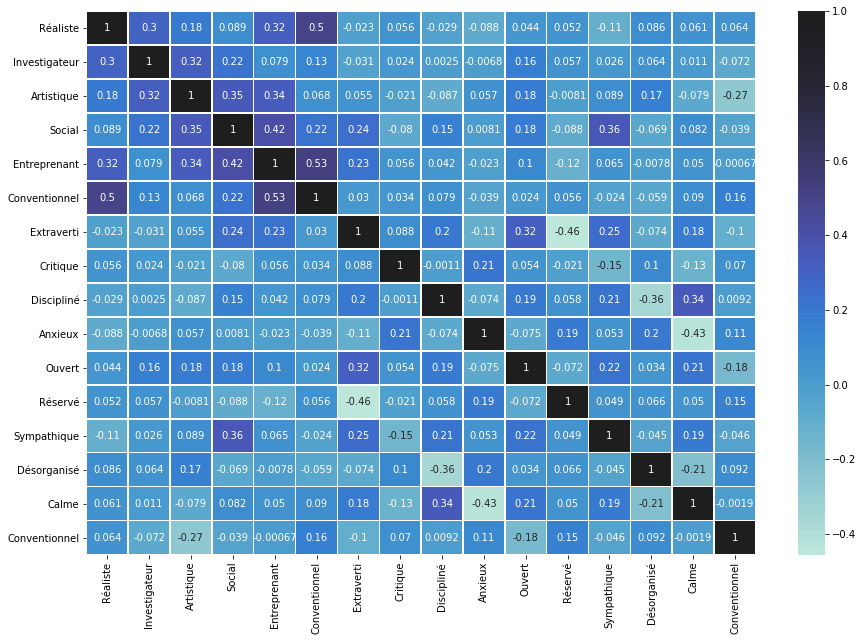

In [17]:
# Let's check the correlation between the variables 

#df_plot = pd.DataFrame(df, columns=Riasec[0])
df_plot = pd.DataFrame(df, columns=Riasec[0] + Tipi[0])

plt.figure(figsize=(15,10)) 
#sns.heatmap(df.corr(), annot=True, xticklabels = Riasec[1], yticklabels = Riasec[1]) 
#sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=.5, xticklabels = Riasec[1], yticklabels = Riasec[1]) 
sns.heatmap(df_plot.corr(), annot=True, center=1, linewidths=.5, xticklabels = Riasec[1] + Tipi[1], yticklabels = Riasec[1]+ Tipi[1]) 


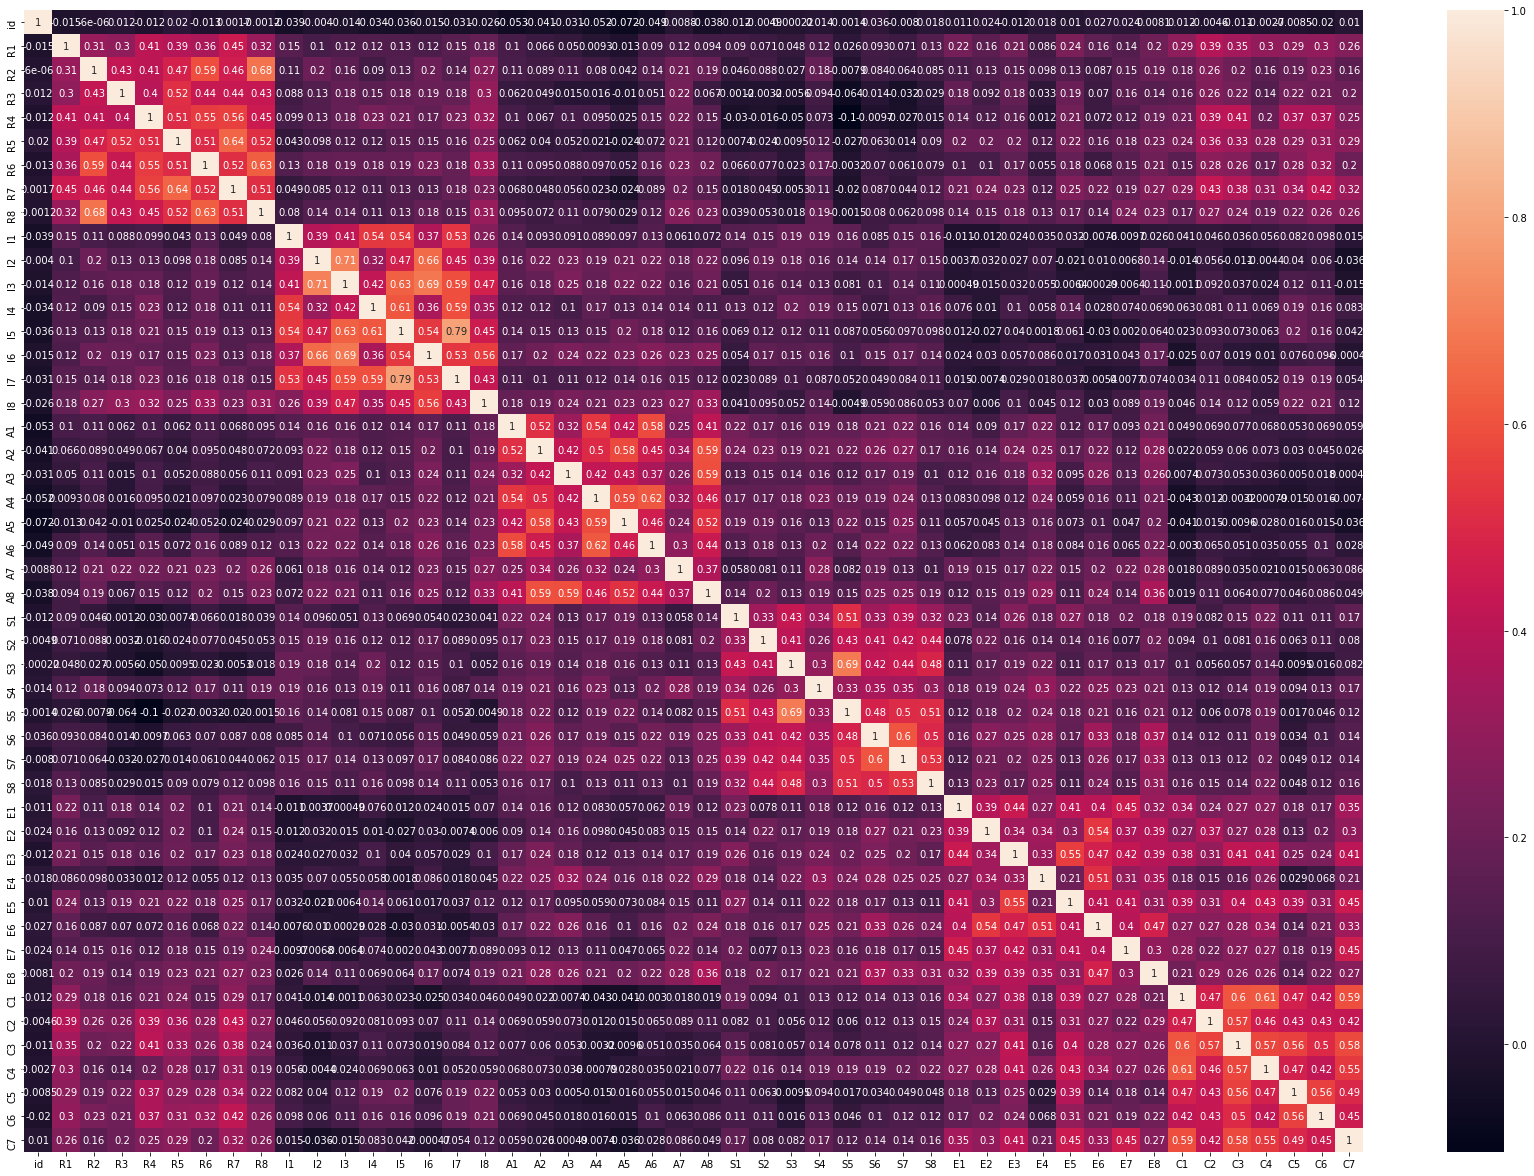

In [18]:
# correlation entre chaque question

df_plot = riasec_df.iloc[:,:48]

plt.figure(figsize=(30,21)) 
sns.heatmap(df_plot.corr(), annot=True) 


La question A7 parrait peu représentative \
A7 : Effectuer des cascades pour un film ou une émission de télévision

## 3.1 : analyse 'age'

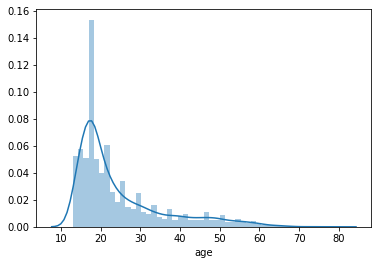

In [19]:



#df['age'].describe()
#histogram
sns.distplot(df.age)


In [20]:
df['age'].describe()

#skewness and kurtosis
print("Skewness: %f" % df['age'].skew())
print("Kurtosis: %f" % df['age'].kurt())

Skewness: 1.552160
Kurtosis: 1.770897


## 3.2 : analyse profil en fonction de l'age

Réaliste


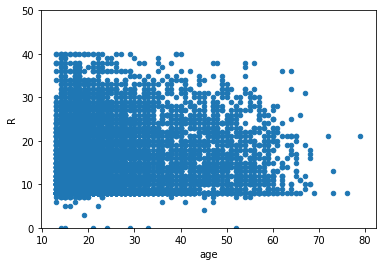

In [21]:
#scatter plot age
axe = 0
y=Riasec[0][axe]
print (Riasec[1][axe])
    
var = 'age'
data = pd.concat([df[Riasec[0][axe]], df[var]], axis=1)
data.plot.scatter(x=var, y=str(y), ylim=(0,50));




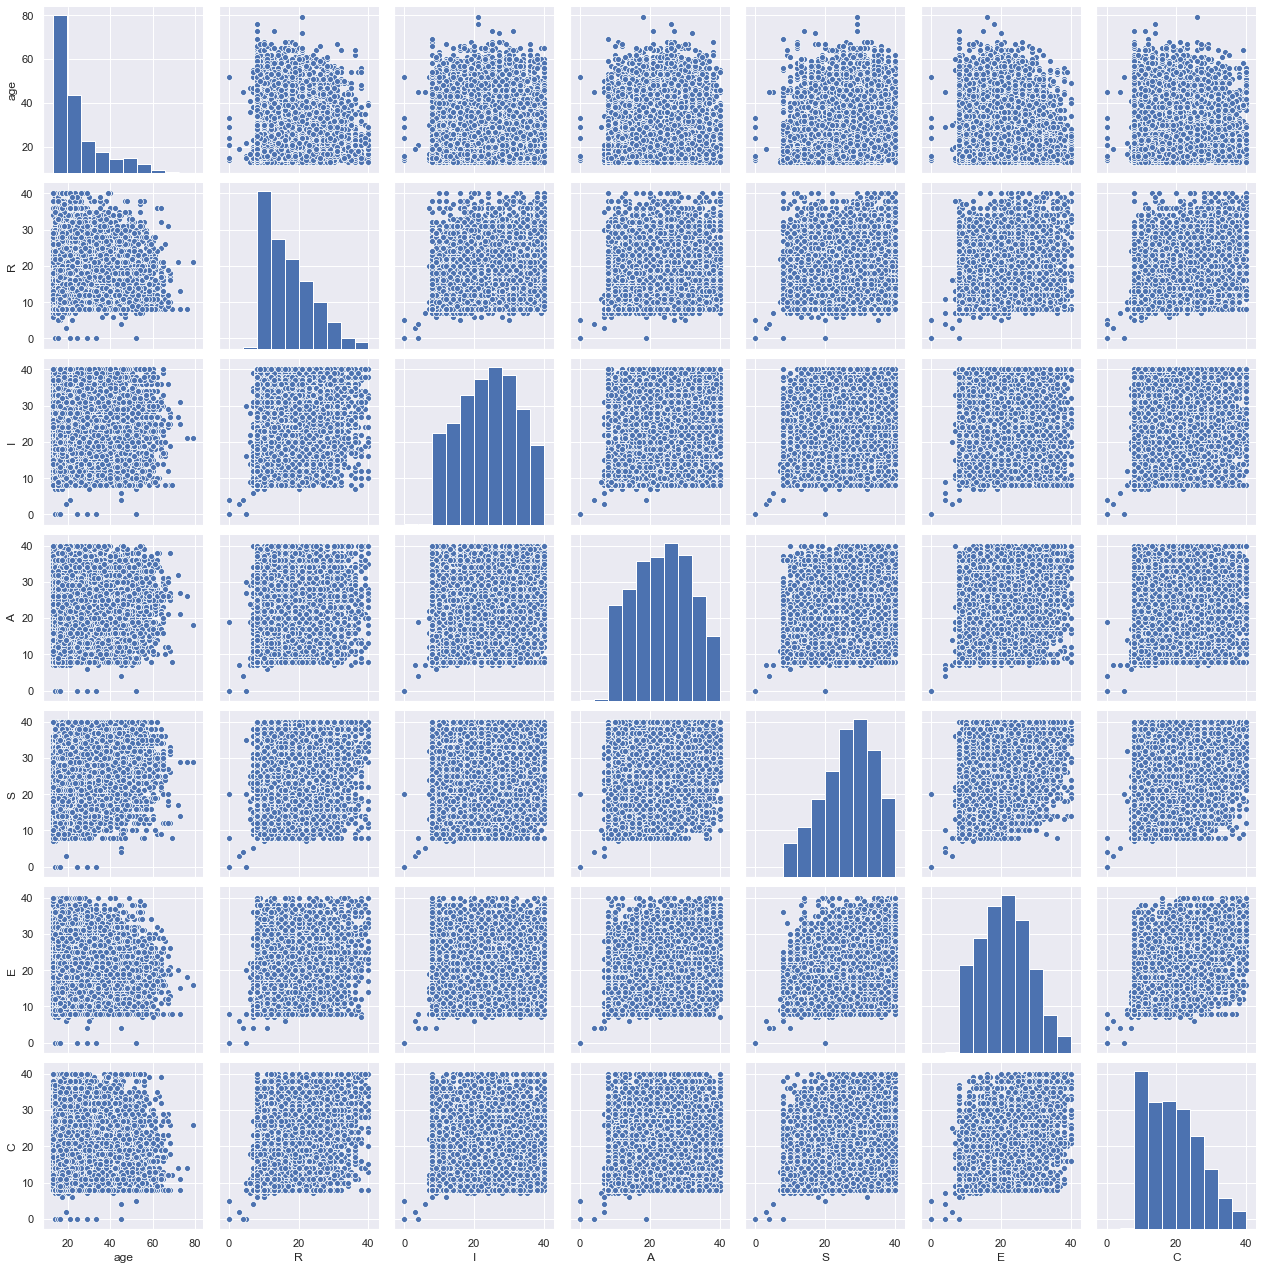

In [22]:
sns.set()
cols = ['age', 'R', 'I', 'A', 'S', 'E', 'C']


#  'education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
#        'orientation', 'race', 'voted', 'married', 'familysize',
#        'uniqueNetworkLocation', 'country', 'source', 'major'

sns.pairplot(df[cols], height = 2.5)
plt.show();

## 3.3 : analyse profil en fonction de la durée de réponse


These other durations were recorded (measured on the server side):

introelapse = The time spent on the introduction/landing page (in seconds)

testelapse = The time spent on all the RIASEC questions (should be equivalent to the time elapsed on all the indiviudal questions combined)

surveyelapse = The time spent answering the supplemental demographic survey


In [23]:

# supprimer les outliers 
riasec_df = riasec_df[riasec_df.introelapse <= 10000]
riasec_df = riasec_df[riasec_df.introelapse > 100]

riasec_df = riasec_df[riasec_df.testelapse <= 10000]
riasec_df = riasec_df[riasec_df.testelapse > 100]

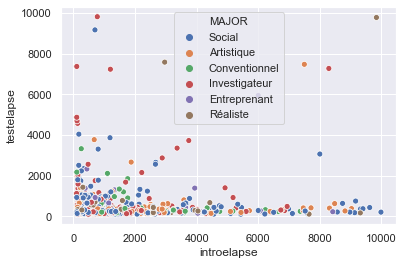

In [24]:
sns.scatterplot( x = 'introelapse', y = 'testelapse', hue = 'MAJOR', data = riasec_df)

In [25]:
# dummies = pd.get_dummies(df['education'])
# df = pd.concat([df,dummies], axis=1)
# df

## Préparation des données

In [65]:
#X = riasec_df.iloc[:,:48]
#X = df[Tipi[0]]
X = df[['introelapse', 'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2',
       'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize',
       'uniqueNetworkLocation', 'source']]
# 'country', 'major'
X

,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,...,age,hand,religion,orientation,race,voted,married,familysize,uniqueNetworkLocation,source
4,576.0,186.0,209.0,6.0,7.0,1.0,7.0,4.0,7.0,7.0,...,18.0,1.0,4.0,3.0,1.0,2.0,1.0,4.0,1.0,0.0
5,1014.0,269.0,189.0,2.0,2.0,3.0,5.0,3.0,6.0,7.0,...,28.0,1.0,2.0,1.0,5.0,1.0,1.0,2.0,1.0,2.0
20,513.0,497.0,789.0,7.0,2.0,7.0,1.0,5.0,5.0,6.0,...,31.0,1.0,6.0,1.0,3.0,1.0,1.0,6.0,2.0,0.0
31,945.0,166.0,11.0,5.0,4.0,7.0,2.0,6.0,2.0,6.0,...,31.0,1.0,6.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0
36,237.0,299.0,241.0,6.0,2.0,7.0,4.0,6.0,3.0,7.0,...,44.0,1.0,4.0,1.0,4.0,2.0,3.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,119.0,145.0,118.0,6.0,2.0,6.0,1.0,7.0,5.0,6.0,...,19.0,1.0,7.0,1.0,4.0,2.0,1.0,7.0,1.0,0.0
9966,361.0,316.0,248.0,3.0,2.0,6.0,2.0,3.0,6.0,6.0,...,65.0,1.0,4.0,1.0,4.0,2.0,1.0,3.0,2.0,2.0
9971,2880.0,361.0,214.0,7.0,2.0,3.0,5.0,6.0,1.0,7.0,...,33.0,1.0,1.0,2.0,4.0,2.0,2.0,3.0,1.0,0.0
9988,272.0,318.0,245.0,3.0,2.0,6.0,5.0,5.0,5.0,6.0,...,16.0,1.0,2.0,1.0,4.0,2.0,1.0,3.0,1.0,0.0


In [66]:
#y = riasec_df['MAX']
y = riasec_df['MAJOR']
y

4              Social
5          Artistique
20      Conventionnel
31      Investigateur
36       Entreprenant
            ...      
9949           Social
9966           Social
9971       Artistique
9988         Réaliste
9994    Investigateur
Name: MAJOR, Length: 1412, dtype: object

# STEP #3: TRAINING THE MODEL - KNeighborsClassifier

In [67]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)


In [68]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
confidence = classifier.score(X_test, y_test)
print('accuracy: {:.2f} %'.format(confidence))

accuracy: 0.27 %


# STEP #4: EVALUATING THE MODEL

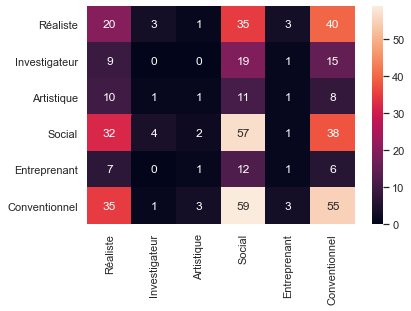

In [70]:
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d", xticklabels = Riasec[1], yticklabels = Riasec[1])

In [71]:
print(classification_report(y_test, y_predict))

               precision    recall  f1-score   support

   Artistique       0.18      0.20      0.19       102
Conventionnel       0.00      0.00      0.00        44
 Entreprenant       0.12      0.03      0.05        32
Investigateur       0.30      0.43      0.35       134
     Réaliste       0.10      0.04      0.05        27
       Social       0.34      0.35      0.35       156

     accuracy                           0.27       495
    macro avg       0.17      0.17      0.16       495
 weighted avg       0.24      0.27      0.25       495



## Random Forest

In [40]:
from sklearn.model_selection import GridSearchCV  
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)

param_grid = { "criterion"   : ["gini", "entropy"],
             "min_samples_leaf" : [1, 5, 10],
             "min_samples_split" : [2, 4, 10, 12, 16],
              "n_estimators": [20, 50, 80, 100, 400]}
#             "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=2)
#                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)   
print(gs.best_params_)  
#print(gs.cv_results_)

C:\Users\Marc\Miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.09596510359869138
{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 20}


C:\Users\Marc\Miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X_train, y_train)
print("%.4f" % rf.oob_score_)

0.4656


In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=75,
                             oob_score=True)

rf.fit(X_train, y_train)
print("%.4f" % rf.oob_score_)

0.4427


In [74]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:10]

,variable,importance
0,testelapse,0.074177
2,TIPI1,0.072759
1,surveyelapse,0.067148
17,hand,0.063123
19,orientation,0.058443
9,TIPI8,0.056433
3,TIPI2,0.048330
12,education,0.046574
4,TIPI3,0.040850
11,TIPI10,0.040632
